<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/machine_learning_application_freguency%2CIntensity_67891011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')             

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon


In [4]:
import pandas as pd
df = pd.read_csv('summary2.csv')
df

,DATE,MON,AAO,AMO,AO,EMI,GMT,NINO3,NINO4,PDO,PNA,QBO,FREG,INTEN
0,198001,1,2468.847,-0.251,-13914.348,0.468,-0.008,0.362,0.318,0.688,-0.787,-1.147,0,0.0
1,198002,2,5287.235,-0.265,-7920.162,0.573,0.048,0.025,0.311,1.233,1.002,3.094,0,0.0
2,198003,3,18067.714,-0.343,-9798.327,0.417,0.005,-0.153,0.166,1.107,-0.539,5.553,0,0.0
3,198004,4,23780.651,-0.064,-4271.158,0.394,0.035,-0.189,0.107,1.255,1.457,11.231,0,0.0
4,198005,5,3995.642,0.046,-8602.326,0.369,0.072,-0.155,0.201,1.204,0.377,18.477,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,202008,8,8954.542,0.263,-1599.950,-0.229,0.320,-0.558,-0.237,-1.413,-0.156,20.514,2,67.5
488,202009,9,4960.132,0.135,4138.498,-0.207,0.435,-0.918,-0.463,-1.137,0.402,20.357,2,90.0
489,202010,10,-10689.321,0.129,662.580,-0.377,0.416,-1.043,-0.695,-0.612,-0.943,19.270,0,0.0
490,202011,11,-13940.175,0.026,16778.709,-0.441,0.519,-1.136,-0.792,-1.451,-0.402,18.811,0,0.0


In [5]:
df.columns

Index(['DATE', 'MON', 'AAO', 'AMO', 'AO', 'EMI', 'GMT', 'NINO3', 'NINO4',
       'PDO', 'PNA', 'QBO', 'FREG', 'INTEN'],
      dtype='object')

In [11]:
X = df.drop(columns = ['DATE','FREG','INTEN']) # "X"라는 변수에 날짜, 횟수와 강도를 제외하고 지정
y = df['FREG']
y2 = df['INTEN']
df_columns_78910 = df[df["MON"].isin([6,7,8,9,10,11])]
X = df_columns_78910.drop(columns = ['DATE','FREG','INTEN'])
y = df_columns_78910['FREG']
y2 = df_columns_78910['INTEN']
X

,MON,AAO,AMO,AO,EMI,GMT,NINO3,NINO4,PDO,PNA,QBO
5,6,-5755.125,-0.011,5854.573,0.332,-0.024,0.059,0.104,-0.282,-0.666,21.490
6,7,26895.281,-0.084,-3503.817,0.357,0.009,-0.240,-0.014,0.204,-0.559,21.300
7,8,8098.580,-0.080,-608.816,-0.085,-0.037,-0.335,-0.313,0.219,-1.079,19.388
8,9,15792.082,-0.140,2012.419,-0.041,-0.069,-0.176,-0.290,0.126,-0.589,19.886
9,10,-9940.679,-0.164,-4343.394,0.223,-0.118,-0.410,-0.067,1.358,1.296,19.961
...,...,...,...,...,...,...,...,...,...,...,...
486,7,13366.147,0.180,-2349.840,0.101,0.354,-0.525,0.041,-1.102,-0.342,19.156
487,8,8954.542,0.263,-1599.950,-0.229,0.320,-0.558,-0.237,-1.413,-0.156,20.514
488,9,4960.132,0.135,4138.498,-0.207,0.435,-0.918,-0.463,-1.137,0.402,20.357
489,10,-10689.321,0.129,662.580,-0.377,0.416,-1.043,-0.695,-0.612,-0.943,19.270


machine learning application

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg,'%')

[[27  7  1  0]
 [ 9  1  0  0]
 [ 3  0  0  0]
 [ 2  0  0  0]]
0.56 %


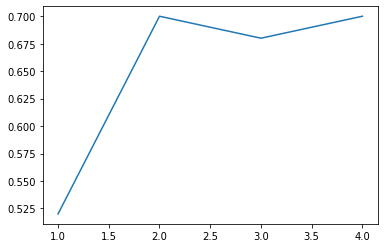

In [14]:
# KNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,5)), list1)
plt.show()

In [15]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn,'%')

[[31  4  0  0]
 [ 6  3  1  0]
 [ 1  2  0  0]
 [ 0  2  0  0]]
0.68 %


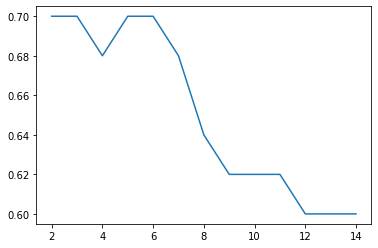

In [16]:
# DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [17]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree, '%')
mylist.append(acc_decisiontree)

[[34  1  0  0]
 [10  0  0  0]
 [ 2  0  1  0]
 [ 2  0  0  0]]
0.7 %


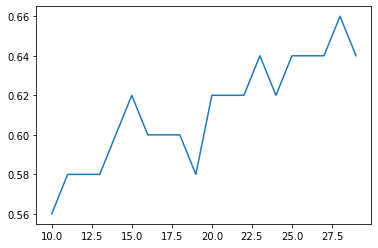

In [18]:
# RANDOM FOREST CLASSIFCATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest,'%')

[[28  7  0  0]
 [ 7  3  0  0]
 [ 2  1  0  0]
 [ 2  0  0  0]]
0.62 %


In [24]:
# ANN (neural network )
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

ann.fit(x_train, y_train, batch_size = 16, epochs = 100)


Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.7288 - accuracy: 0.2857
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7166 - accuracy: 0.3163
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.3520
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.3878
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.4439
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4592
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.4847
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.4949
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5051
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.4949
Epoch 11/

In [25]:
import numpy as np
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

2/2 [==============================] - 0s 6ms/step
Confusion Matrix
[[26  9  0  0]
 [ 5  5  0  0]
 [ 1  2  0  0]
 [ 0  2  0  0]]

Accuracy
0.62


In [26]:
# DNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Input

i = Input(shape=(None, 455, 11))

x = Dense(16, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)

y = Dense(1, activation='sigmoid')(x)

dnn_adam = Model(inputs=i, outputs=y)

dnn_adam.compile(optimizer='adam', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

dnn_adam.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 455, 11)]   0         
                                                                 
 dense_15 (Dense)            (None, None, 455, 32)     384       
                                                                 
 dropout_3 (Dropout)         (None, None, 455, 32)     0         
                                                                 
 dense_16 (Dense)            (None, None, 455, 64)     2112      
                                                                 
 dropout_4 (Dropout)         (None, None, 455, 64)     0         
                                                                 
 dense_17 (Dense)            (None, None, 455, 32)     2080      
                                                                 
 dropout_5 (Dropout)         (None, None, 455, 32)     0     

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

history_adam = dnn_adam.fit(x=x_train, y=y_train,
                             validation_data=(x_test, y_test),
                             epochs=300,
                             callbacks=[early_stopping])

Epoch 1/300


1/7 [===>..........................] - ETA: 4s - loss: 0.7170 - accuracy: 0.5625

7/7 [==============================] - 1s 36ms/step - loss: 0.7829 - accuracy: 0.4847 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 2/300
7/7 [==============================] - 0s 7ms/step - loss: 0.8170 - accuracy: 0.5510 - val_loss: 0.6969 - val_accuracy: 0.5800
Epoch 3/300
7/7 [==============================] - 0s 10ms/step - loss: 0.8451 - accuracy: 0.4898 - val_loss: 0.6952 - val_accuracy: 0.6600
Epoch 4/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6255 - accuracy: 0.5102 - val_loss: 0.6950 - val_accuracy: 0.6800
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 0.7630 - accuracy: 0.5102 - val_loss: 0.6964 - val_accuracy: 0.6600
Epoch 6/300
7/7 [==============================] - 0s 6ms/step - loss: 0.7603 - accuracy: 0.5255 - val_loss: 0.6975 - val_accuracy: 0.6400
Epoch 7/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6990 - accuracy: 0.5000 - val_loss: 0.6968 - val_accuracy: 0.6400
Epoch 8/300
7/7 [===================

In [28]:
import numpy as np
y_pred = dnn_adam.predict(x_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_dnn = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_dnn)
mylist.append(ac_dnn)

2/2 [==============================] - 0s 6ms/step
Confusion Matrix
[[35  0  0  0]
 [10  0  0  0]
 [ 3  0  0  0]
 [ 2  0  0  0]]

Accuracy
0.7


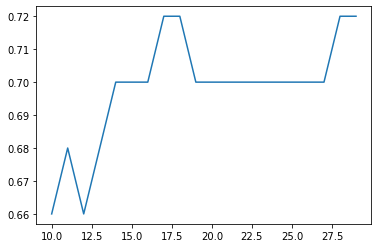

In [29]:
# xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [30]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 15, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(max_depth=12, n_estimators=15, objective='multi:softprob',
              subsample=0.7)

In [31]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_xgboost = accuracy_score(y_test, y_pred)
mylist.append(ac_xgboost)
print(cm)
print(ac_xgboost)

[[30  5  0  0]
 [ 5  5  0  0]
 [ 2  1  0  0]
 [ 2  0  0  0]]
0.7


In [32]:
# catboost
!pip install catboost

from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.5 MB/s 
Learning rate set to 0.072816
0:	learn: 1.7178437	total: 58.5ms	remaining: 58.5s
1:	learn: 1.6565878	total: 67.6ms	remaining: 33.8s
2:	learn: 1.6122481	total: 76.3ms	remaining: 25.4s
3:	learn: 1.5681850	total: 85.3ms	remaining: 21.2s
4:	learn: 1.5119090	total: 94.9ms	remaining: 18.9s
5:	learn: 1.4637406	total: 104ms	remaining: 17.1s
6:	learn: 1.4134449	total: 113ms	remaining: 16s
7:	learn: 1.3640764	total: 121ms	remaining: 15s
8:	learn: 1.3214533	total: 130ms	remaining: 14.3s
9:	learn: 1.2939757	total: 139ms	remaining: 13.8s
10:	learn: 1.2620683	total: 148ms	remaining: 13.3s
11:	learn: 1.2310005	total: 161ms	remaining: 13.2s
12:	learn: 1.2099510	total: 177ms	remaining: 13.4s
13:	learn: 1.1807604	total: 187ms	remaining: 13.2s
14:	learn: 1.1568608	total: 199ms	remaining: 13s
15:	learn: 1.1315536	total: 216ms	remaining: 13.3s
16:	lear

In [33]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_catboost = accuracy_score(y_test, y_pred)
mylist.append(ac_catboost)
print(cm)
print(ac_catboost)

[[30  5  0  0]
 [ 6  4  0  0]
 [ 2  1  0  0]
 [ 1  1  0  0]]
0.68


In [34]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'ANN', 'DNN',  
              'Decision Tree','xgboost','catboost'],
    'Score': [acc_knn, acc_logreg, 
              acc_randomforest, ac_ann, ac_dnn, acc_decisiontree,ac_xgboost,ac_catboost
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,DNN,0.70
5,Decision Tree,0.70
6,xgboost,0.70
0,KNN,0.68
7,catboost,0.68
2,Random Forest,0.62
3,ANN,0.62
1,Logistic Regression,0.56


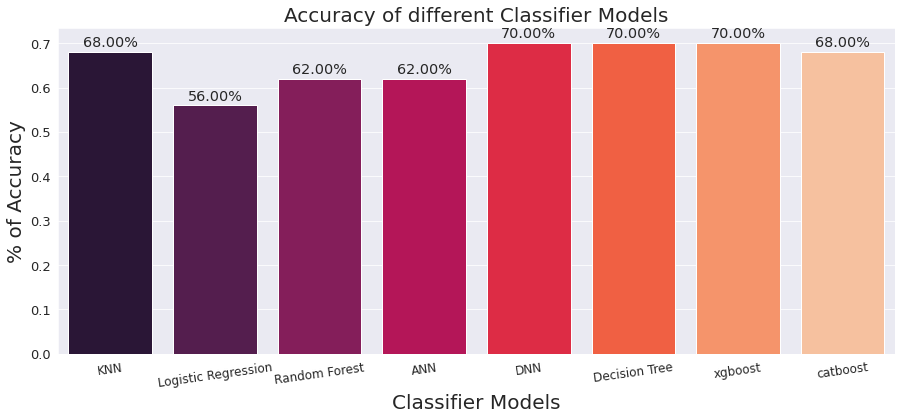

In [35]:
import seaborn as sns 
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [38]:
df_columns_78910['INTEN'] = df_columns_78910['INTEN'].astype(int)
y2 = df_columns_78910['INTEN']
y2

x_train,x_test,y_train,y_test = train_test_split(X,y2,test_size=0.2)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg,'%')

[[32  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]]
0.64 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


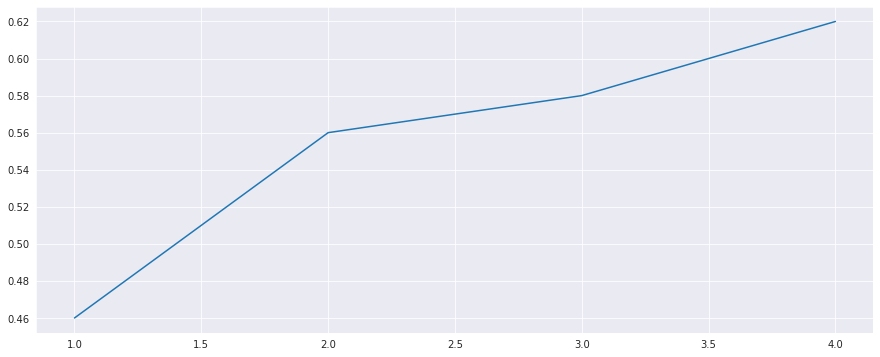

[[29  1  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]]
0.58 %


In [39]:
# KNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,5)), list1)
plt.show()
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn,'%')

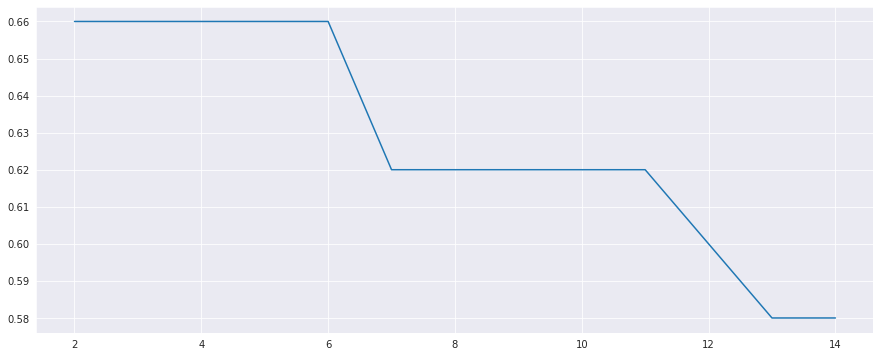

[[33  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]]
0.66 %


In [40]:
# DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()
classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree, '%')
mylist.append(acc_decisiontree)


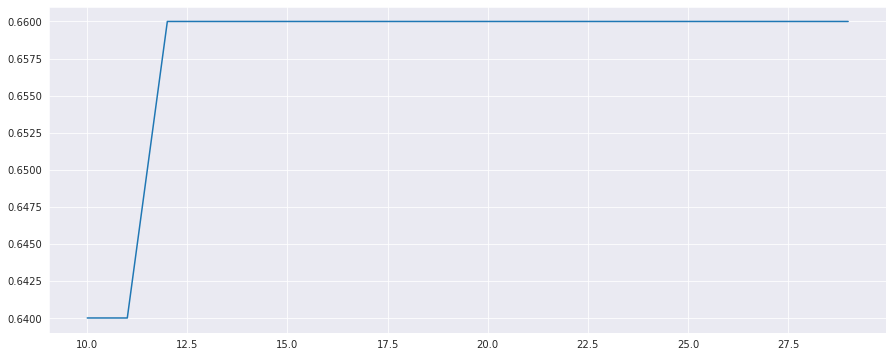

[[33  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]]
0.66 %


In [41]:
# RANDOM FOREST CLASSIFCATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show() 

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest,'%')

In [42]:
# ANN (neural network )

x_train,x_test,y_train,y_test = train_test_split(X,y2,test_size=0.3)

import tensorflow as tf
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.1, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)
# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD

# Compiling the ANN
opt = Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(x_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.3)
import numpy as np
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

Epoch 1/100
4/4 [==============================] - 2s 140ms/step - loss: -10.0846 - accuracy: 0.0917 - val_loss: -61.9849 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: -205.2807 - accuracy: 0.0000e+00 - val_loss: -500.9886 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: -1036.7743 - accuracy: 0.0000e+00 - val_loss: -2156.7134 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: -3530.5979 - accuracy: 0.0000e+00 - val_loss: -6740.7803 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: -11907.5488 - accuracy: 0.0000e+00 - val_loss: -17734.0742 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: -24905.0000 - accuracy: 0.0000e+00 - val_loss: -42536.7422 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 58ms/step - los

In [43]:
# DNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Input

i = Input(shape=(None, 455, 11))

x = Dense(16, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)

y = Dense(1, activation='sigmoid')(x)

dnn_adam = Model(inputs=i, outputs=y)

dnn_adam.compile(optimizer='adam', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

dnn_adam.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

history_adam = dnn_adam.fit(x=x_train, y=y_train,
                             validation_data=(x_test, y_test),
                             epochs=100,
                             callbacks=[early_stopping])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 455, 11)]   0         
                                                                 
 dense_25 (Dense)            (None, None, 455, 32)     384       
                                                                 
 dropout_10 (Dropout)        (None, None, 455, 32)     0         
                                                                 
 dense_26 (Dense)            (None, None, 455, 64)     2112      
                                                                 
 dropout_11 (Dropout)        (None, None, 455, 64)     0         
                                                                 
 dense_27 (Dense)            (None, None, 455, 32)     2080      
                                                                 
 dropout_12 (Dropout)        (None, None, 455, 32)     0   

1/6 [====>.........................] - ETA: 7s - loss: -481.4087 - accuracy: 0.3438

6/6 [==============================] - 2s 86ms/step - loss: -19069.6895 - accuracy: 0.2733 - val_loss: -5181.9595 - val_accuracy: 0.0541
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: -5444.1816 - accuracy: 0.2558 - val_loss: -13510.2129 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 23ms/step - loss: -21370.3516 - accuracy: 0.1860 - val_loss: -21554.9141 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: -41226.6211 - accuracy: 0.1337 - val_loss: -29456.9297 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: -58727.5820 - accuracy: 0.1453 - val_loss: -39080.0117 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: -61743.5234 - accuracy: 0.1395 - val_loss: -50315.2695 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: -104171.0469 - accurac

In [44]:
import numpy as np
y_pred = dnn_adam.predict(x_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_dnn = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_dnn)
mylist.append(ac_dnn)

3/3 [==============================] - 0s 5ms/step
Confusion Matrix
[[ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 

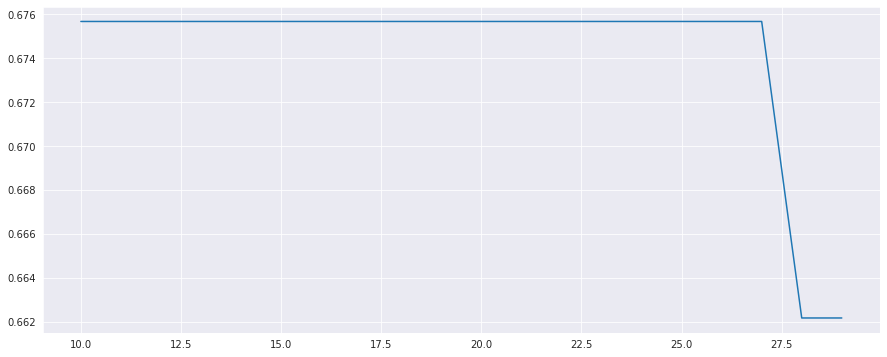

In [45]:
# xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [46]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 15, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)


XGBClassifier(max_depth=12, n_estimators=15, objective='multi:softprob',
              subsample=0.7)

In [47]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_xgboost = accuracy_score(y_test, y_pred)
mylist.append(ac_xgboost)
print(cm)
print(ac_xgboost)

[[50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [48]:
# catboost
!pip install catboost

from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_catboost = accuracy_score(y_test, y_pred)
mylist.append(ac_catboost)
print(cm)
print(ac_catboost)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Learning rate set to 0.072333
0:	learn: 2.9645973	total: 26.3ms	remaining: 26.3s
1:	learn: 2.8445762	total: 48.4ms	remaining: 24.2s
2:	learn: 2.7490574	total: 70.2ms	remaining: 23.3s
3:	learn: 2.6718979	total: 97ms	remaining: 24.2s
4:	learn: 2.5708307	total: 127ms	remaining: 25.3s
5:	learn: 2.4802978	total: 148ms	remaining: 24.5s
6:	learn: 2.3931571	total: 175ms	remaining: 24.8s
7:	learn: 2.3248204	total: 198ms	remaining: 24.5s
8:	learn: 2.2347917	total: 219ms	remaining: 24.1s
9:	learn: 2.1902236	total: 240ms	remaining: 23.8s
10:	learn: 2.1464990	total: 262ms	remaining: 23.5s
11:	learn: 2.1028622	total: 283ms	remaining: 23.3s
12:	learn: 2.0640911	total: 309ms	remaining: 23.4s
13:	learn: 2.0263726	total: 330ms	remaining: 23.2s
14:	learn: 1.9935761	total: 352ms	remaining: 23.1s
15:	learn: 1.9503833	total: 378ms	remaining: 23.2s
16:	learn: 1.9193646	total: 400ms	remaining: 23.2s
17:	learn: 1

In [49]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'ANN', 'DNN',  
              'Decision Tree','xgboost','catboost'],
    'Score': [acc_knn, acc_logreg, 
              acc_randomforest, ac_ann, ac_dnn, acc_decisiontree,ac_xgboost,ac_catboost
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,xgboost,0.675676
7,catboost,0.675676
2,Random Forest,0.660000
5,Decision Tree,0.660000
1,Logistic Regression,0.640000
0,KNN,0.580000
3,ANN,0.000000
4,DNN,0.000000


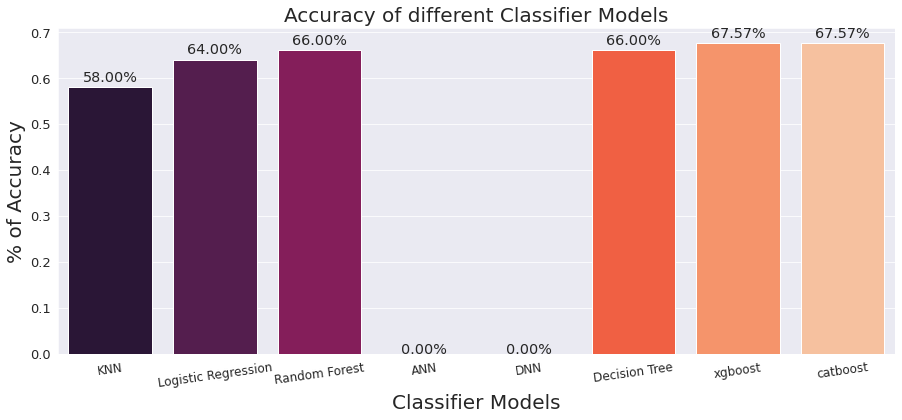

In [50]:
import seaborn as sns 
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()